In [1]:
## JSON DATA EXTRACT FROM FILES 


In [2]:
#Merging all the json file into One
import json
import glob

result = []
for f in glob.glob("C:/Private/Python/Python Project/Practice/Machine Learning Projects/Rating Prediction Project/TripAdvisorJson.tar/TripAdvisorJson/json/*.json"):
    with open(f, "rb") as infile:
        result.append(json.load(infile))

with open("merged_file.json", "w") as outfile:
     json.dump(result, outfile)

In [4]:
import pandas as pd
from pandas import json_normalize
df = pd.read_json("merged_file.json", lines=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3459 entries, 0 to 3458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Reviews    3459 non-null   object
 1   HotelInfo  3459 non-null   object
dtypes: object(2)
memory usage: 54.2+ KB


In [5]:
new_df = pd.concat([pd.DataFrame(json_normalize(x)) for x in df['Reviews'].dropna()],ignore_index=True)
new_df

,Content,Date,ReviewID,Author,Ratings.Service,Ratings.Business service,Ratings.Cleanliness,Ratings.Check in / front desk,Ratings.Overall,Ratings.Value,Ratings.Rooms,Ratings.Location,AuthorLocation,Title,Ratings.Sleep Quality,"Ratings.Business service (e.g., internet access)"
0,Value + Lake Union views This somewhat aged ho...,"Sep 14, 2007",UR751328458,kangarooish,4,-1,3,3,3,4,3,4,NaN,NaN,NaN,NaN
1,Inexpensive and close to downtown without the ...,"Sep 1, 2003",UR889039735,A TripAdvisor Member,-1,-1,-1,-1,4,-1,-1,-1,NaN,NaN,NaN,NaN
2,Atmosphere reminiscent of 'Dirty pretty things...,"Feb 7, 2005",UR774729399,A TripAdvisor Member,-1,-1,-1,-1,1,-1,-1,-1,NaN,NaN,NaN,NaN
3,Oh the Humanity I am not sure where I should b...,"Jul 15, 2004",UR990418295,A TripAdvisor Member,-1,-1,-1,-1,1,-1,-1,-1,NaN,NaN,NaN,NaN
4,Filthy Pit This hotel was the worst hotel I ha...,"May 24, 2004",UR469934272,A TripAdvisor Member,-1,-1,-1,-1,1,-1,-1,-1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402023,Excellent hotel! My husband and I stayed at th...,"January 5, 2004",UR1539374,A TripAdvisor Member,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,"Dallas, TX",“Recommended! I'll stay there again.”,NaN,NaN
402024,My wife and I spent a week in this hotel over ...,"January 2, 2004",UR1535504,jspade,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,"Granville Ferry, Canada",“A Great Place to Stay”,NaN,NaN
402025,After having to leave another Midtown Manhatta...,"December 30, 2003",UR1532979,A TripAdvisor Member,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,"Odenton, MD",“Quality and Class”,NaN,NaN
402026,My 2 girlfriends and I stayed at the Roosevelt...,"December 29, 2003",UR1532446,LKnussman27,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,"Scotia, NY",“Perfect Trip to the Roosevelt”,NaN,NaN


In [199]:
new_df.to_csv("TripAdvisorReviews.csv") #Storing the data to new File

In [6]:
review_df = pd.read_csv("TripAdvisorReviews.csv")

In [7]:
review_df.columns #To check the column names 

Index(['Unnamed: 0', 'Content', 'Date', 'ReviewID', 'Author',
       'Ratings.Service', 'Ratings.Business service', 'Ratings.Cleanliness',
       'Ratings.Check in / front desk', 'Ratings.Overall', 'Ratings.Value',
       'Ratings.Rooms', 'Ratings.Location', 'AuthorLocation', 'Title',
       'Ratings.Sleep Quality',
       'Ratings.Business service (e.g., internet access)'],
      dtype='object')

In [8]:
review_df.shape #Dataset comprises of 1388 observations and 15 characteristics.(no. of rows and columns)

(402028, 17)

In [9]:
review_df.info() #To know about the datatype of columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402028 entries, 0 to 402027
Data columns (total 17 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Unnamed: 0                                        402028 non-null  int64  
 1   Content                                           402028 non-null  object 
 2   Date                                              402028 non-null  object 
 3   ReviewID                                          402028 non-null  object 
 4   Author                                            402028 non-null  object 
 5   Ratings.Service                                   358457 non-null  float64
 6   Ratings.Business service                          34418 non-null   float64
 7   Ratings.Cleanliness                               358103 non-null  float64
 8   Ratings.Check in / front desk                     101804 non-null  float64
 9   Rati

In [10]:
#As you see all the Ratings columns datatype is obj. as we took it from JSON file so it converts all the data to string. Now i am gonna convert it to integer.
review_df[["Ratings.Service", "Ratings.Cleanliness","Ratings.Overall" ,"Ratings.Value", "Ratings.Sleep Quality", "Ratings.Rooms", "Ratings.Location", "Ratings.Business service (e.g., internet access)", "Ratings.Check in / front desk"]] = review_df[["Ratings.Service", "Ratings.Cleanliness", "Ratings.Overall","Ratings.Value", "Ratings.Sleep Quality", "Ratings.Rooms", "Ratings.Location", "Ratings.Business service (e.g., internet access)", "Ratings.Check in / front desk"]].apply(pd.to_numeric)

In [11]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402028 entries, 0 to 402027
Data columns (total 17 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Unnamed: 0                                        402028 non-null  int64  
 1   Content                                           402028 non-null  object 
 2   Date                                              402028 non-null  object 
 3   ReviewID                                          402028 non-null  object 
 4   Author                                            402028 non-null  object 
 5   Ratings.Service                                   358457 non-null  float64
 6   Ratings.Business service                          34418 non-null   float64
 7   Ratings.Cleanliness                               358103 non-null  float64
 8   Ratings.Check in / front desk                     101804 non-null  float64
 9   Rati

In [12]:
review_df.describe() #To check the stats of the data

,Unnamed: 0,Ratings.Service,Ratings.Business service,Ratings.Cleanliness,Ratings.Check in / front desk,Ratings.Overall,Ratings.Value,Ratings.Rooms,Ratings.Location,Ratings.Sleep Quality,"Ratings.Business service (e.g., internet access)"
count,402028.000000,358457.000000,34418.000000,358103.000000,101804.000000,402028.000000,358523.000000,329578.000000,305019.000000,174414.000000,38393.000000
mean,201013.500000,3.807168,0.631966,4.013538,3.071913,3.873962,3.722353,3.785168,4.033005,4.096913,3.515693
std,116055.631348,1.461477,2.318979,1.379461,2.124229,1.239851,1.466030,1.424135,1.516860,1.156700,1.276468
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,100506.750000,3.000000,-1.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000
50%,201013.500000,4.000000,-1.000000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000
75%,301520.250000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,402027.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [13]:
review_df.isnull().mean() #Here we can drop some columns like Ratings.Business service as it is almost 91 % above emty

Unnamed: 0                                          0.000000
Content                                             0.000000
Date                                                0.000000
ReviewID                                            0.000000
Author                                              0.000000
Ratings.Service                                     0.108378
Ratings.Business service                            0.914389
Ratings.Cleanliness                                 0.109259
Ratings.Check in / front desk                       0.746774
Ratings.Overall                                     0.000000
Ratings.Value                                       0.108214
Ratings.Rooms                                       0.180211
Ratings.Location                                    0.241299
AuthorLocation                                      0.123583
Title                                               0.085611
Ratings.Sleep Quality                               0.566165
Ratings.Business service

In [14]:
#Fill missing value with zero
review_df['Date']= pd.to_datetime(review_df['Date']) 
review_df['Ratings.Service'] = review_df['Ratings.Service'].fillna(0).astype(int)
review_df['Ratings.Cleanliness'] = review_df['Ratings.Cleanliness'].fillna(0).astype(int)
review_df['Ratings.Value'] = review_df['Ratings.Value'].fillna(0).astype(int)
review_df['Ratings.Sleep Quality'] = review_df['Ratings.Sleep Quality'].fillna(0).astype(int)
review_df['Ratings.Rooms'] = review_df['Ratings.Rooms'].fillna(0).astype(int)
review_df['Ratings.Location'] = review_df['Ratings.Location'].fillna(0).astype(int)
review_df['Ratings.Overall'] = review_df['Ratings.Overall'].fillna(0).astype(int)
review_df['Ratings.Business service (e.g., internet access)'] = review_df['Ratings.Business service (e.g., internet access)'].fillna(0).astype(int)
review_df['Ratings.Check in / front desk'] = review_df['Ratings.Check in / front desk'].fillna(0).astype(int)
review_df.head()




,Unnamed: 0,Content,Date,ReviewID,Author,Ratings.Service,Ratings.Business service,Ratings.Cleanliness,Ratings.Check in / front desk,Ratings.Overall,Ratings.Value,Ratings.Rooms,Ratings.Location,AuthorLocation,Title,Ratings.Sleep Quality,"Ratings.Business service (e.g., internet access)"
0,0,Value + Lake Union views This somewhat aged ho...,2007-09-14,UR751328458,kangarooish,4,-1.0,3,3,3,4,3,4,NaN,NaN,0,0
1,1,Inexpensive and close to downtown without the ...,2003-09-01,UR889039735,A TripAdvisor Member,-1,-1.0,-1,-1,4,-1,-1,-1,NaN,NaN,0,0
2,2,Atmosphere reminiscent of 'Dirty pretty things...,2005-02-07,UR774729399,A TripAdvisor Member,-1,-1.0,-1,-1,1,-1,-1,-1,NaN,NaN,0,0
3,3,Oh the Humanity I am not sure where I should b...,2004-07-15,UR990418295,A TripAdvisor Member,-1,-1.0,-1,-1,1,-1,-1,-1,NaN,NaN,0,0
4,4,Filthy Pit This hotel was the worst hotel I ha...,2004-05-24,UR469934272,A TripAdvisor Member,-1,-1.0,-1,-1,1,-1,-1,-1,NaN,NaN,0,0


In [15]:
review_df['Ratings.Overall'].value_counts()

5    162502
4    120147
3     55966
2     33217
1     30011
0       185
Name: Ratings.Overall, dtype: int64

In [16]:
#just to check if the all the other rating except "Ratings.Overall" is impacting the overall rating or has any co relation. i tried to create the average of all the other columns and we can further 
review_df['Average_Rating'] = review_df[["Ratings.Service", "Ratings.Cleanliness", "Ratings.Value", "Ratings.Sleep Quality", "Ratings.Rooms", "Ratings.Location", "Ratings.Business service (e.g., internet access)", "Ratings.Check in / front desk"]].mean(axis=1)
review_df['Average_Rating']  

0         2.625
1        -0.750
2        -0.750
3        -0.750
4        -0.750
          ...  
402023    0.000
402024    0.000
402025    0.000
402026    0.000
402027    0.000
Name: Average_Rating, Length: 402028, dtype: float64

In [17]:
#As we can see there is quite difference between Overall rating and Average Rating. 
#so it may possible that overall rating is not much dependent on other ratings.(it may possible)
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib inline

<AxesSubplot:xlabel='Ratings.Overall', ylabel='Average_Rating'>

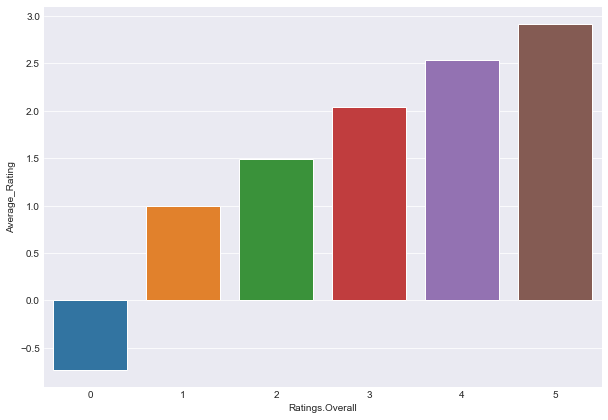

In [18]:
#Plotting the bar chart for overall rating and rating location. if they have some relation. can check using other params also again the Ratings.Overall
df1 = pd.DataFrame(review_df.groupby('Ratings.Overall')['Average_Rating'].mean().reset_index())
fig = plt.figure(figsize=(10,7))
sns.barplot(x=df1['Ratings.Overall'], y=df1['Average_Rating']) 

In [229]:
#In dtale libraries this all graphs  we can easily do EDA, so to do more EDA i have used d-tale library

In [19]:
#Dtale library does is to generate an interactive graphical interface in which we can define what we want the data to look like
# and do an exploratory analysis of data as we like.
# As dtale library shows all the correlation, or all the charts so let's check with it. 
import dtale 
dtale_obj = dtale.show(review_df)
dtale_obj.open_browser()





##### I plot the graph between date vs ReviewID, to get more insights about the data. from this we came to know that in which year most review is given.
##### That does mean that in that year the TripAdvisor users get increased and may chance of more revenue, but to check that we might need some more data ! 
[bar_export_1604751278038.png](attachment:bar_export_1604751278038.png)

In [21]:
#Data Preprocessing : for Content columns as we need to build a Rating Prediction model. so the input will be Text. 
#Input Text: AS content is the input text there are dirty of text as it is feedback from the user.
#We will do some steps to get the more weighted words. so steps will include removing of stop words, removal of puncuation, removing of hyperlinks , etc
import nltk
import string
from nltk.corpus import stopwords
import re
nltk.download('stopwords')
en_stopwords = stopwords.words('english')

def remove_stopwords(text):
    resultwords  = [word for word in re.split("\W+",text) if word not in en_stopwords]
    result = ' '.join(resultwords)
    return result

def clean_text(text):
    text = text.lower()                                                   # Make text lowercase
    text = re.sub('\[.*?\]', '', text)                                    # Remove text in square brackets    
    text = re.sub('https?://\S+|www\.\S+', ' ', text)                      # Remove hyper links
    text = re.sub('<.*?>+', '', text)                                     # Remove texts in angular brackets <xxx>
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)       # Remove punctuation
    text = re.sub('\w*\d\w*', '', text)  # Remove words containing numbers
    text = remove_stopwords(text)
    return text

review_df['cleaned_text'] = review_df['Content'].apply(clean_text)
review_df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey.jaradi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,Content,Date,ReviewID,Author,Ratings.Service,Ratings.Business service,Ratings.Cleanliness,Ratings.Check in / front desk,Ratings.Overall,Ratings.Value,Ratings.Rooms,Ratings.Location,AuthorLocation,Title,Ratings.Sleep Quality,"Ratings.Business service (e.g., internet access)",Average_Rating,cleaned_text
0,0,Value + Lake Union views This somewhat aged ho...,2007-09-14,UR751328458,kangarooish,4,-1.0,3,3,3,4,3,4,NaN,NaN,0,0,2.625,value lake union views somewhat aged hotel wal...
1,1,Inexpensive and close to downtown without the ...,2003-09-01,UR889039735,A TripAdvisor Member,-1,-1.0,-1,-1,4,-1,-1,-1,NaN,NaN,0,0,-0.750,inexpensive close downtown without parking pro...
2,2,Atmosphere reminiscent of 'Dirty pretty things...,2005-02-07,UR774729399,A TripAdvisor Member,-1,-1.0,-1,-1,1,-1,-1,-1,NaN,NaN,0,0,-0.750,atmosphere reminiscent dirty pretty things exe...
3,3,Oh the Humanity I am not sure where I should b...,2004-07-15,UR990418295,A TripAdvisor Member,-1,-1.0,-1,-1,1,-1,-1,-1,NaN,NaN,0,0,-0.750,oh humanity sure begin cons place furniture pu...
4,4,Filthy Pit This hotel was the worst hotel I ha...,2004-05-24,UR469934272,A TripAdvisor Member,-1,-1.0,-1,-1,1,-1,-1,-1,NaN,NaN,0,0,-0.750,filthy pit hotel worst hotel ever experienced ...


In [ ]:
#I am gonna Create a text file for ML model. As i am gonna use fasttext algorithm which is a facebook algorithm that is mostly used for Word Vectorization and Text Classification.
#so I created a text file named as **review_fasttext**. 
#As fasttext wants the input file in a formatted way. like there should be two columns seperated with spaces. and label should contains "__label__"
#For example :
#Label Reviews (Note it should n't have the column names in the text file)
#__label__one Hotel was nice
#And after that i am gonna create a train and test split file.
#I splitted the files manually.

In [ ]:
review_df.to_csv("review_dataframe_for_models.csv", index=False)

In [24]:
#Create fasttext valid file 

f = open("review_fasttext","w+")
rating_label_value = ''
for index, line in review_df.iterrows():
    rating_label = line['Ratings.Overall']
    if(rating_label == 4):
        rating_label_value = "__label__four"
    elif(rating_label == 3):
        rating_label_value = "__label__three"
    elif(rating_label == 2):
        rating_label_value = "__label__two"
    elif(rating_label == 1):
        rating_label_value = "__label__one"
    elif(rating_label == 5):
        rating_label_value = "__label__five"
    elif(rating_label == 0):
        rating_label_value = "__label__zero"
    clean_text =  line['cleaned_text'].replace('\n',' ').replace('\r', ' ')
    f.write("{} {} \r\n".format(rating_label_value, clean_text.encode('utf-8')))
f.close()


Executing shutdown due to inactivity...


2020-11-07 19:42:34,488 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2020-11-07 19:42:50,537 - INFO     - Executing shutdown...


In [244]:
review_df['Ratings.Overall'].value_counts() #To check if the data is not skew towards only one ratings. as it is distributed still 5,4 rating data is more but we can check and train our model


5    162502
4    120147
3     55966
2     33217
1     30011
0       185
Name: Ratings.Overall, dtype: int64

In [ ]:
#As this all doesn't seems to be the good scores Let's try with Fasttext. but i am gonna try outside as the data is too large.
import fasttext
model = fasttext.train_supervised(input="review_fasttext.train", lr=1.0, wordNgrams=2, epoch=25, bucket=200000, dim=50, loss='ova')
# model = fasttext.train_supervised(input="review_fasttext.train", lr=1.0, wordNgrams=2, epoch=25, bucket=200000, dim=50, loss='ova')
model.save_model("review_rating_model.bin")



Exception ignored in: <function SeekableUnicodeStreamReader.__del__ at 0x000002BA9F957438>
Traceback (most recent call last):
  File "c:\users\shrey.jaradi\appdata\local\programs\python\python37\lib\site-packages\nltk\data.py", line 1281, in __del__
    self.close()
  File "c:\users\shrey.jaradi\appdata\local\programs\python\python37\lib\site-packages\nltk\data.py", line 1310, in close
    self.stream.close()
KeyboardInterrupt
